# Numerical handling of schrodinger equation

Consider the following one dimensional schrodinger equation -

$$
\frac{-\hbar^2}{2m} \frac{d^2\Psi(x)}{dx^2} + V(x)\Psi(x) = E\Psi(x)
$$

in range $x \in [a, b]$ with boundary condition $\Psi(x=a)=\Psi_a$, and $\Psi(x=b)=\Psi_b$

- We first descretize the `position' space and define $x_n = a + t n$ where $t = \frac{b - a}{N}$, $N$ being the number of samples. $x_0 = a$, and $x_N = b$

- We approximate the double derivatives using central difference formula

$$
\frac{d^2\Psi}{d x^2}\biggr|_{x=x_n} \approx {\Psi_{n+1} -2 \Psi_{n} + \Psi_{n-1} \over t^2}
$$

We approximate the double derivatives using central difference formula

$$
-\frac{\hbar^2}{2mt^2}\left({\Psi_{n+1} -2 \Psi_{n} + \Psi_{n-1}}\right) + V_n\Psi_n = E\Psi_n
$$

or, rearranging the terms we get

$$
\left(-{\Psi_{n+1} +2 \Psi_{n} - \Psi_{n-1}}\right) + \frac{2mt^2}{\hbar^2}V_n\Psi_n = E\Psi_n
$$

equivalently

$$
-\Psi_{n+1} +(2 + \frac{2mt^2}{\hbar^2}V_n)\Psi_n - \Psi_{n-1} = E\Psi_n
$$

Using $v_n = 2(1 + \frac{mt^2}{\hbar^2})V_n$, we can simplify the recurrance relation as following 
$$
-\Psi_{n+1} + v_n\Psi_{n} -\Psi_{n-1} = E\Psi_n
$$



We approximate the double derivatives using central difference formula



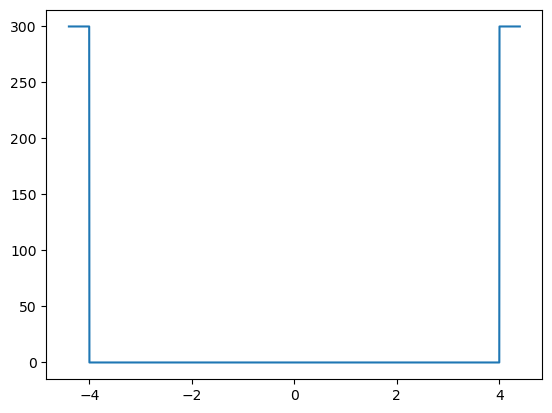

In [48]:
from ast import Del
import numpy as np
import matplotlib.pyplot as plt

# constants

Box_Width = 4.0
Delta = 0.1 * Box_Width
V0 = 300.0

alpha = 1.0
Npoints = 2000

def potential_box(x):
    f = 0.0
    if abs(x) <= Box_Width:
        f = 0.0
    else:
        if abs(x) > Box_Width and abs(x) <= Box_Width + Delta:
            f = V0
        else:
            f = 100 * V0
    #
    return f

def potential_harmonic(x):
    return x**2
#
potential = potential_box
Fvec = np.vectorize(potential)

xi, dx = np.linspace(-Box_Width - Delta, Box_Width + Delta, Npoints, retstep=True)

Vi = Fvec(xi)
vi = 2 * (1 + alpha * dx**2 * Vi)
Psi = np.zeros(xi.shape)

def get_matrix(vi):
    n = vi.shape[0]
    mat = np.zeros((n, n))
    for i in range(1, n):
        mat[i, i - 1] = -1
        mat[i-1, i] = -1
    #
    np.fill_diagonal(mat, vi)
    return mat
#
plt.plot(xi, Vi)

In [49]:
M = get_matrix(vi)
eig, vecs = np.linalg.eigh(M)
# eigenvalues are in array eig in numerically increasing order.
# corresponding eigenvectors are in vecs as columns.
# i'th eigenvalues is eig[i] with eigenvector vecs[:, i]


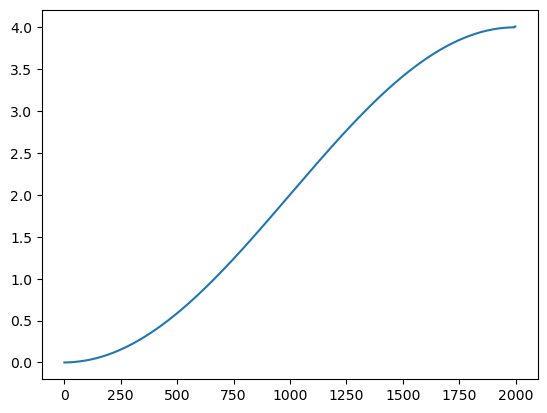

In [50]:
plt.plot(eig);plt.show()

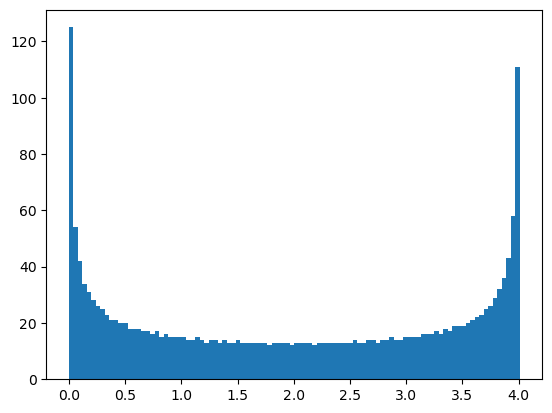

In [51]:
plt.hist(eig, bins=100);plt.show()

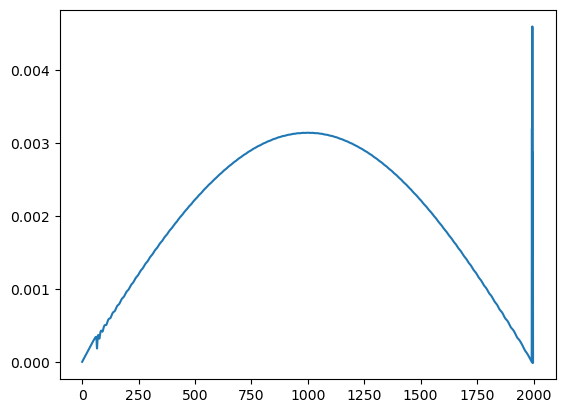

In [52]:
plt.plot(np.diff(eig))

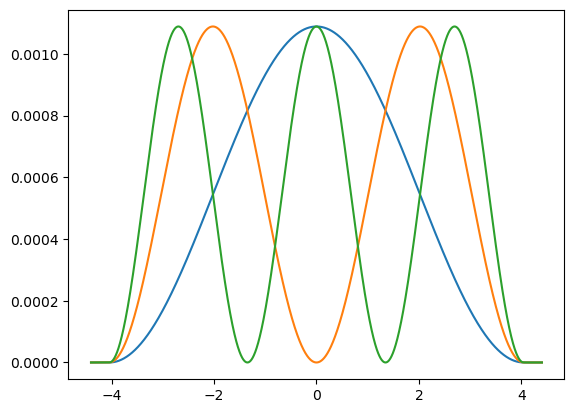

In [53]:
for i in range(3):
    plt.plot(xi, vecs[:, i]**2)
#
plt.show()

In [54]:
potential = potential_harmonic
Fvec = np.vectorize(potential)

xi1, dx1 = np.linspace(-Box_Width - Delta, Box_Width + Delta, Npoints, retstep=True)

Vi1 = Fvec(xi1)
vi1 = 2 * (1 + alpha * dx1**2 * Vi1)
Psi1 = np.zeros(xi.shape)

M1 = get_matrix(vi1)
eig1, vecs1 = np.linalg.eigh(M1)


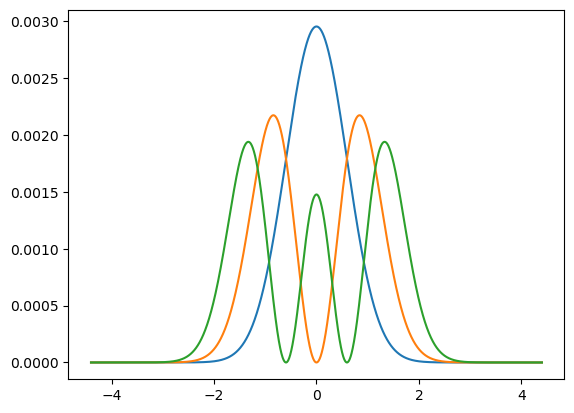

In [60]:
for i in range(3):
    plt.plot(xi1, vecs1[:, i]**2)
#
plt.show()

In [62]:
evecs = vecs.T

(2000, 2000)

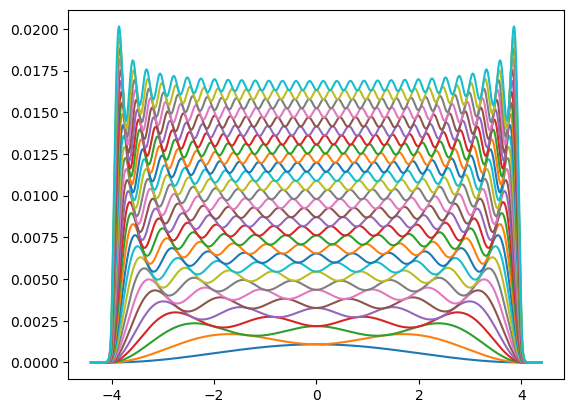

In [77]:
vv = (vecs**2).cumsum(axis=1)
for i in range(30):
    plt.plot(xi, vv[:, i])
#
plt.show()